In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
np.random.seed(42)
X = np.random.randn(2000)  # 输入数据
# Y = 3.0 * X + np.random.randn(1000) * 2.0  # 带噪声的输出数据，斜率为3，噪声为2
Y = 3.0 * X + np.random.normal(0,2,2000)

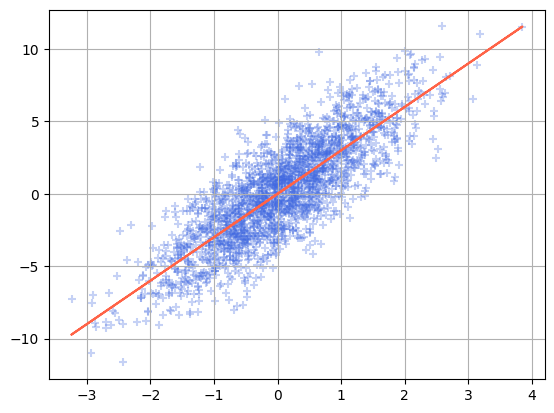

In [3]:
plt.scatter(X,Y,marker = "+",color = "royalblue",alpha = 0.3)
plt.plot(X,3*X,color = "tomato")
plt.grid()

In [4]:
def normal_dist(x,mu,sigma):
    return 1/(np.sqrt(2*np.pi) * sigma + 1e-6) * np.exp(-(x-mu)**2/(2 * sigma**2 + 1e-6))

In [5]:
def z_var_dist(z0,mu0,sigma0): #参数z的变分分布
    return normal_dist(z0,mu0,sigma0)

In [6]:
def para_grad(z,phi): #求变分概率密度对各个参数的梯度
    dg0_1 =  1/(phi[1]**2 + 1e-6) * (z[0] - phi[0])
    dg0_2 =  -1/(phi[1] + 1e-6)  + 1/(phi[1]**3+1e-6) *(z[0] - phi[0])**2
    return np.array([dg0_1,dg0_2])

In [7]:
def data_dist(d,z):
    return normal_dist(d[1],d[0] * z[0], 2)

In [8]:
def ELBO_grad(d,z,phi):
    log_pz = np.log(data_dist(d,z) + 1e-10)
    log_q = np.log(z_var_dist(z[0],phi[0],phi[1]) + 1e-10)
    grad = para_grad(z,phi) *(log_pz - log_q)
    elbo = z_var_dist(z[0],phi[0],phi[1])* (log_pz - log_q)
    return grad,elbo

In [9]:
def train_epoch(X, Y, phi, lr=0.01):
    num = len(X)
    accu_grad = np.array([0.0, 0.0])
    accu_elbo = 0 
    
    for i in range(num):
        rand_z0 = np.random.normal(phi[0], np.maximum(phi[1], 1e-3))  
        rand_z = np.array([rand_z0])
        dg, el =  ELBO_grad(np.array([X[i], Y[i]]), rand_z, phi)
        accu_grad += dg 
        accu_elbo += el
    
    
    phi[0] += accu_grad[0] * lr / num  
    phi[1] = np.maximum(phi[1] + accu_grad[1] * lr / num, 1e-3)  

    accu_elbo /= num
    return phi, accu_elbo


In [10]:
phi = np.array([1,1])  #参数z变分分布的参数

In [11]:
track = np.zeros((10000,2))
accel = np.zeros((10000,1))
track[0] = phi
for i in range(1,10000):
    track[i],accel[i] = train_epoch(X,Y,track[i-1])
    print(track[i],accel[i])

[1.00490324 1.0072223 ] [-0.42310539]
[1.01021641 1.01481771] [-0.40405356]
[1.01398335 1.0218888 ] [-0.40429583]
[1.01815438 1.02977097] [-0.40608726]
[1.02237781 1.03883754] [-0.38878604]
[1.0276318 1.0456309] [-0.38820177]
[1.03212687 1.05307228] [-0.38413784]
[1.03704866 1.06011769] [-0.37564378]
[1.04244415 1.06600032] [-0.3770503]
[1.04773538 1.07122618] [-0.3774303]
[1.05226769 1.07778237] [-0.37527825]
[1.05663824 1.08476324] [-0.35892131]
[1.06161132 1.0907758 ] [-0.35638521]
[1.06599962 1.09819572] [-0.35792728]
[1.07181325 1.10384797] [-0.34308198]
[1.07670825 1.10988044] [-0.34983561]
[1.08098369 1.11631025] [-0.35350378]
[1.08561744 1.12140143] [-0.33159726]
[1.09011525 1.12806536] [-0.33516944]
[1.09440189 1.13488803] [-0.3301259]
[1.09916139 1.1405756 ] [-0.34106796]
[1.10315105 1.14628933] [-0.32154887]
[1.10705706 1.15254353] [-0.31465937]
[1.11165058 1.1585501 ] [-0.32375523]
[1.11614902 1.16316185] [-0.30921943]
[1.12062762 1.16874702] [-0.31288937]
[1.12528888 1.174

[1.8052193  1.75684497] [-0.12180646]
[1.80779272 1.75877791] [-0.11686161]
[1.81102097 1.76034261] [-0.12334088]
[1.81411309 1.76233777] [-0.11761574]
[1.81652642 1.7645715 ] [-0.11732835]
[1.81920824 1.76623836] [-0.12316774]
[1.82254188 1.76748524] [-0.11664324]
[1.82541955 1.76945026] [-0.12468559]
[1.82820633 1.77034108] [-0.11997304]
[1.83041204 1.77155958] [-0.11093177]
[1.83286062 1.7734767 ] [-0.11522557]
[1.83558097 1.77564989] [-0.1183812]
[1.83852592 1.77675636] [-0.11218187]
[1.84147358 1.77811187] [-0.12009499]
[1.84439124 1.77828322] [-0.11376838]
[1.84715095 1.78011036] [-0.11164725]
[1.85001523 1.78081789] [-0.11458869]
[1.85306254 1.78221573] [-0.10630876]
[1.85569965 1.78307862] [-0.11753045]
[1.85798822 1.78443688] [-0.11152401]
[1.86096181 1.78589778] [-0.11103688]
[1.86415246 1.78762572] [-0.11656572]
[1.86710564 1.7900797 ] [-0.10983548]
[1.86977019 1.79206752] [-0.11424308]
[1.87285105 1.79408026] [-0.10697508]
[1.8747263  1.79512104] [-0.10935588]
[1.87696787 1

[2.27768761 1.97279122] [-0.07834479]
[2.27951599 1.97371696] [-0.07833998]
[2.28065358 1.97394671] [-0.08634926]
[2.28267793 1.9728128 ] [-0.08391149]
[2.28461884 1.97249738] [-0.08071731]
[2.28635403 1.9733646 ] [-0.07978709]
[2.28770443 1.97379835] [-0.08394968]
[2.28952931 1.97400613] [-0.0819652]
[2.29062496 1.97457797] [-0.0762261]
[2.29208242 1.97527319] [-0.0830053]
[2.29351913 1.97491277] [-0.07510892]
[2.29471398 1.97541987] [-0.07603226]
[2.29574517 1.97606809] [-0.07742408]
[2.2973373  1.97711042] [-0.07873323]
[2.29922255 1.97767897] [-0.08452296]
[2.30103242 1.97841888] [-0.08188012]
[2.30262349 1.97852177] [-0.08019054]
[2.30452796 1.97971683] [-0.08360706]
[2.30538189 1.97894203] [-0.07291209]
[2.30740863 1.97975761] [-0.08582868]
[2.30888189 1.98026639] [-0.08091211]
[2.31059493 1.98188235] [-0.0842115]
[2.31222202 1.98125094] [-0.07806865]
[2.31439303 1.98174838] [-0.07503883]
[2.31586297 1.98213369] [-0.07815425]
[2.31763243 1.98191725] [-0.08022939]
[2.31903271 1.98

[2.5632399  2.02003097] [-0.0706929]
[2.5640004  2.01927916] [-0.07200754]
[2.56476822 2.02106457] [-0.07251133]
[2.56556029 2.02134813] [-0.06721729]
[2.56673201 2.02130231] [-0.07075875]
[2.56789978 2.02142938] [-0.07266289]
[2.56950289 2.0207826 ] [-0.07335389]
[2.5702648  2.02017052] [-0.07254852]
[2.57177453 2.01912747] [-0.0713768]
[2.57223603 2.01940652] [-0.06602849]
[2.57332902 2.01901177] [-0.06880638]
[2.57424225 2.01972515] [-0.07296435]
[2.57473208 2.01882492] [-0.07642102]
[2.57559164 2.01818623] [-0.07028273]
[2.5764462 2.0175887] [-0.06897322]
[2.57735947 2.01783874] [-0.07407641]
[2.57853187 2.01812547] [-0.07242998]
[2.57986663 2.01886097] [-0.07007074]
[2.58061093 2.01951883] [-0.07081044]
[2.58090877 2.01981189] [-0.07146972]
[2.58177782 2.02098366] [-0.0703931]
[2.58257028 2.02123673] [-0.07384769]
[2.58350359 2.02099623] [-0.07567051]
[2.58419475 2.02121621] [-0.07506587]
[2.58504244 2.02178764] [-0.06698094]
[2.58520991 2.02207053] [-0.07351425]
[2.58590984 2.022

[2.72515331 2.04427278] [-0.06643309]
[2.72575455 2.04462959] [-0.06762253]
[2.72571523 2.04316415] [-0.07109385]
[2.7262279  2.04359361] [-0.0718761]
[2.72678137 2.04433943] [-0.07233397]
[2.72738358 2.04425593] [-0.06816584]
[2.72798478 2.04466352] [-0.07026784]
[2.72822456 2.04474593] [-0.06831557]
[2.72865768 2.04559351] [-0.06667219]
[2.72933327 2.04631626] [-0.06959875]
[2.73013725 2.04647355] [-0.06706428]
[2.7308664  2.04584274] [-0.06356598]
[2.73156246 2.04733398] [-0.0687627]
[2.7317728  2.04772204] [-0.06648722]
[2.73250369 2.04754931] [-0.06771057]
[2.73331678 2.0469515 ] [-0.06925356]
[2.73381417 2.04747859] [-0.06725245]
[2.73429477 2.04788798] [-0.07119591]
[2.73482737 2.04774796] [-0.06930174]
[2.73540681 2.04899468] [-0.06909758]
[2.73603088 2.04965146] [-0.06819489]
[2.73654788 2.05070042] [-0.06610807]
[2.73660265 2.05111289] [-0.06899199]
[2.73674424 2.05156356] [-0.06845262]
[2.73741747 2.05220468] [-0.06857519]
[2.73766387 2.05184608] [-0.0651426]
[2.73823862 2.0

[2.82421371 2.05375374] [-0.06817864]
[2.82474534 2.05300309] [-0.06476342]
[2.82501941 2.05456597] [-0.07005828]
[2.8254155  2.05547503] [-0.06920978]
[2.82572894 2.05571995] [-0.06511141]
[2.82554547 2.05618968] [-0.06656303]
[2.8261137  2.05445847] [-0.06857385]
[2.82640222 2.05479372] [-0.06698919]
[2.82653467 2.05312258] [-0.071582]
[2.82637017 2.05235946] [-0.06530251]
[2.8267178  2.05235948] [-0.06828222]
[2.82651432 2.05135964] [-0.06898549]
[2.82677382 2.0518747 ] [-0.06905605]
[2.82688466 2.05203191] [-0.06770907]
[2.82679867 2.05223195] [-0.06053653]
[2.82717628 2.05250917] [-0.06894496]
[2.82708635 2.05268255] [-0.0707533]
[2.82723308 2.05266008] [-0.06595931]
[2.82761233 2.05152454] [-0.06785292]
[2.82766444 2.04971101] [-0.06666877]
[2.82748718 2.04908507] [-0.06434701]
[2.82747533 2.04974752] [-0.06121187]
[2.82780768 2.04988479] [-0.06322759]
[2.82863882 2.0506762 ] [-0.07073444]
[2.82908823 2.05049509] [-0.06737132]
[2.8295953  2.05093311] [-0.07067626]
[2.8297353  2.0

[2.8720772  2.05696705] [-0.06955]
[2.87220488 2.05777473] [-0.0643605]
[2.87235723 2.05721134] [-0.06246697]
[2.8729721 2.0572873] [-0.07208401]
[2.8733175  2.05755579] [-0.06564498]
[2.87340401 2.05810817] [-0.06622905]
[2.87301009 2.05719924] [-0.06593112]
[2.87286564 2.05685707] [-0.0645783]
[2.87336779 2.05748985] [-0.06814821]
[2.87346729 2.0574079 ] [-0.06512716]
[2.87370898 2.05799366] [-0.06569513]
[2.87369288 2.05763136] [-0.0655667]
[2.87393136 2.05765694] [-0.06377472]
[2.87440375 2.05850998] [-0.0650692]
[2.87411217 2.05803688] [-0.06409915]
[2.87386001 2.05839358] [-0.06557748]
[2.87434108 2.05806884] [-0.06550109]
[2.87451327 2.05915432] [-0.07093385]
[2.87432977 2.05914788] [-0.06758294]
[2.87495426 2.05901998] [-0.06426964]
[2.87519622 2.05926419] [-0.06480192]
[2.87519566 2.05978812] [-0.06462525]
[2.87568326 2.05970165] [-0.06576244]
[2.8757884  2.05944631] [-0.06550962]
[2.87591054 2.05900094] [-0.06763183]
[2.87654129 2.05786634] [-0.0668013]
[2.87657834 2.05812961

[2.91013363 2.05989695] [-0.06571655]
[2.91056872 2.05968352] [-0.0692445]
[2.91120992 2.05881449] [-0.06995361]
[2.91160502 2.05899396] [-0.06591007]
[2.91192714 2.05868004] [-0.06817441]
[2.91198261 2.05738165] [-0.0655929]
[2.91166511 2.05740019] [-0.06511039]
[2.91178911 2.05761409] [-0.0638431]
[2.91168254 2.05773015] [-0.06596506]
[2.91155242 2.05726593] [-0.06687999]
[2.91146457 2.05652617] [-0.06640163]
[2.91197883 2.05600433] [-0.06644102]
[2.91195373 2.0561944 ] [-0.06806171]
[2.9126554  2.05620172] [-0.06472508]
[2.91310496 2.056069  ] [-0.06469346]
[2.91308877 2.05735101] [-0.06565308]
[2.91362691 2.05770697] [-0.06293171]
[2.91344133 2.05826918] [-0.06699934]
[2.91321181 2.05941862] [-0.06607452]
[2.91316147 2.06005201] [-0.06901289]
[2.91331129 2.06060669] [-0.06895313]
[2.91329569 2.06096675] [-0.06646276]
[2.91319518 2.06013508] [-0.06588851]
[2.91398688 2.05933955] [-0.06045196]
[2.91394114 2.05969413] [-0.06702459]
[2.91450634 2.06039905] [-0.06570362]
[2.91416391 2.0

[2.92759267 2.06545901] [-0.06283491]
[2.92854389 2.06497602] [-0.06732738]
[2.92859297 2.06520705] [-0.06932751]
[2.92885327 2.06499549] [-0.06233991]
[2.92905466 2.06441462] [-0.06773448]
[2.92907803 2.064859  ] [-0.06688119]
[2.92933963 2.06604719] [-0.07018413]
[2.92961496 2.06630887] [-0.06679365]
[2.92920667 2.06698314] [-0.06768761]
[2.92970835 2.06694396] [-0.06759957]
[2.92968175 2.0676876 ] [-0.06234085]
[2.9303352  2.06714185] [-0.07130108]
[2.93017358 2.06669622] [-0.06462179]
[2.93026958 2.06749016] [-0.06493449]
[2.93019409 2.06717122] [-0.06312352]
[2.93023203 2.0661824 ] [-0.06560745]
[2.93028706 2.06579756] [-0.06374247]
[2.93024092 2.06642822] [-0.06665014]
[2.93032706 2.06619714] [-0.06538293]
[2.93011598 2.06641448] [-0.06983927]
[2.9301324  2.06463581] [-0.0697729]
[2.93006839 2.06422913] [-0.06955205]
[2.92982287 2.06372009] [-0.06961718]
[2.92992371 2.06310753] [-0.06743921]
[2.92947998 2.06345178] [-0.06273851]
[2.92997025 2.064833  ] [-0.07083402]
[2.92982343 2

[2.93860865 2.07948029] [-0.0637924]
[2.93851117 2.07934313] [-0.06760818]
[2.93842488 2.07886218] [-0.06818808]
[2.93883015 2.07929849] [-0.06035136]
[2.93849458 2.07831151] [-0.06461647]
[2.93813632 2.07776032] [-0.06587494]
[2.93831153 2.07738964] [-0.06669475]
[2.9383388  2.07676941] [-0.06412119]
[2.93913213 2.07637384] [-0.06516734]
[2.93973408 2.0764092 ] [-0.0643704]
[2.93971121 2.07732417] [-0.06792033]
[2.93986415 2.07554514] [-0.06516765]
[2.94009517 2.07456212] [-0.06186827]
[2.94034102 2.0748847 ] [-0.06606405]
[2.9402516  2.07437361] [-0.06766928]
[2.94037074 2.07597   ] [-0.06545664]
[2.93995408 2.07697241] [-0.06586941]
[2.94047085 2.07609326] [-0.06562432]
[2.94066486 2.0759511 ] [-0.0639974]
[2.94064687 2.07596218] [-0.06622061]
[2.94000946 2.07587114] [-0.06501095]
[2.93969423 2.07586577] [-0.06598026]
[2.93996389 2.07614982] [-0.06564233]
[2.93997646 2.07516947] [-0.064021]
[2.94003155 2.07609507] [-0.06890655]
[2.93981049 2.07647315] [-0.06838243]
[2.94001581 2.077

[2.95293784 2.07820379] [-0.06819635]
[2.95300813 2.07826335] [-0.06310121]
[2.95381929 2.07891182] [-0.06203974]
[2.95359979 2.07955566] [-0.06435703]
[2.95334696 2.07910824] [-0.06356921]
[2.95325688 2.07840146] [-0.06725596]
[2.953627   2.07857535] [-0.06374669]
[2.95421867 2.07763901] [-0.06683745]
[2.95413588 2.07787826] [-0.06237982]
[2.95430769 2.07765934] [-0.06584951]
[2.95408592 2.07675114] [-0.06689297]
[2.95404276 2.07706073] [-0.06950806]
[2.9539291  2.07747164] [-0.06635222]
[2.95387234 2.07797479] [-0.06306389]
[2.95347387 2.07730585] [-0.06577493]
[2.95343584 2.07759676] [-0.06649484]
[2.95271351 2.07776089] [-0.06405532]
[2.95285917 2.07782079] [-0.05940293]
[2.9535403  2.07798568] [-0.06508471]
[2.95373972 2.07841531] [-0.06630739]
[2.95389953 2.07781419] [-0.06619564]
[2.95393388 2.07820365] [-0.06676533]
[2.95385506 2.0770078 ] [-0.06899216]
[2.95357507 2.07717786] [-0.06265275]
[2.95339591 2.07677012] [-0.06331736]
[2.95322981 2.07746313] [-0.06608945]
[2.95277941 

[2.95466606 2.07638853] [-0.06408279]
[2.95439408 2.07574755] [-0.06568964]
[2.95445308 2.07439948] [-0.06539953]
[2.95410306 2.07405411] [-0.0655194]
[2.95357383 2.0751745 ] [-0.06561588]
[2.95408587 2.07581152] [-0.06144966]
[2.95417883 2.07423163] [-0.0653574]
[2.95438514 2.07423055] [-0.06596572]
[2.95442336 2.07547932] [-0.06489208]
[2.95450855 2.0760548 ] [-0.06533741]
[2.95448155 2.07603554] [-0.06320997]
[2.95480425 2.07687971] [-0.06307436]
[2.95465934 2.0774268 ] [-0.07076176]
[2.95446638 2.07781168] [-0.06575911]
[2.95480319 2.07827328] [-0.06645412]
[2.9546937  2.07908732] [-0.0669375]
[2.95481128 2.0792187 ] [-0.06495105]
[2.95478493 2.07952341] [-0.06598057]
[2.95478567 2.07979681] [-0.06494847]
[2.95428787 2.08006305] [-0.06443681]
[2.95461444 2.08001981] [-0.06692378]
[2.95431933 2.07967075] [-0.06979256]
[2.95401957 2.08028563] [-0.06709508]
[2.95422299 2.08021312] [-0.06673282]
[2.95453695 2.07993523] [-0.06490277]
[2.95490769 2.07972638] [-0.06843817]
[2.95482492 2.0

[2.95994383 2.07819764] [-0.0645776]
[2.95982874 2.07757537] [-0.06072729]
[2.96036225 2.07628223] [-0.06634391]
[2.96055946 2.07658083] [-0.0668595]
[2.96137571 2.07631763] [-0.06026962]
[2.96172715 2.07631948] [-0.06589985]
[2.96204312 2.07618825] [-0.06625573]
[2.96217038 2.07674311] [-0.06368316]
[2.96188098 2.0769657 ] [-0.0676771]
[2.96246696 2.07694461] [-0.06360004]
[2.9626862  2.07793097] [-0.06429061]
[2.96266997 2.07767156] [-0.06482241]
[2.96268211 2.07758588] [-0.06814509]
[2.962966   2.07811584] [-0.06325443]
[2.96326755 2.07815691] [-0.06560273]
[2.9632343  2.07819512] [-0.06397658]
[2.96369731 2.07770099] [-0.06872302]
[2.96384056 2.07774988] [-0.06047555]
[2.9639788  2.07823645] [-0.06349035]
[2.9638029 2.0774852] [-0.06282495]
[2.96366632 2.07675211] [-0.0658408]
[2.96375161 2.07745672] [-0.06016285]
[2.96370503 2.07805519] [-0.06751912]
[2.96332839 2.07881489] [-0.06509639]
[2.96324304 2.07912704] [-0.06652563]
[2.96319141 2.0798373 ] [-0.06572493]
[2.96281415 2.0791

[2.97145191 2.06373122] [-0.06671724]
[2.97072042 2.06314142] [-0.06910719]
[2.97028068 2.06258779] [-0.06611383]
[2.96969101 2.06247434] [-0.06507976]
[2.96997062 2.06190633] [-0.06913579]
[2.97002368 2.0620129 ] [-0.06720104]
[2.96943946 2.0617525 ] [-0.06758908]
[2.96926062 2.06008165] [-0.06586832]
[2.96914574 2.05973942] [-0.06610371]
[2.96907484 2.06083505] [-0.06783613]
[2.96884543 2.0608475 ] [-0.06795452]
[2.96911532 2.06077019] [-0.06837293]
[2.96897513 2.06019616] [-0.06465194]
[2.9687875  2.06088321] [-0.06691112]
[2.96829371 2.06007375] [-0.06343213]
[2.96848983 2.05993895] [-0.06896861]
[2.96848612 2.05897712] [-0.06733298]
[2.96831176 2.05923659] [-0.06498636]
[2.96764755 2.06023947] [-0.06710221]
[2.96779031 2.06014028] [-0.06647718]
[2.96837624 2.05980297] [-0.06727146]
[2.9682354  2.06090032] [-0.06666014]
[2.96828052 2.06182351] [-0.06832371]
[2.96783881 2.06216272] [-0.06796261]
[2.96735944 2.06133443] [-0.06339946]
[2.96757617 2.06190565] [-0.0648551]
[2.9674917  2

[2.96474337 2.06939036] [-0.06748343]
[2.96460185 2.06873387] [-0.06598356]
[2.96463095 2.06858843] [-0.06781787]
[2.9650202  2.07004329] [-0.0697974]
[2.96494724 2.06992297] [-0.06308622]
[2.96496163 2.0686422 ] [-0.06448672]
[2.96484275 2.06784762] [-0.06428654]
[2.96506174 2.06757394] [-0.06517777]
[2.96520166 2.06797123] [-0.06716051]
[2.96456197 2.06743899] [-0.06574613]
[2.96522171 2.06732118] [-0.06832275]
[2.96564805 2.06868006] [-0.06693367]
[2.96550076 2.06816362] [-0.06563438]
[2.96524391 2.06821161] [-0.06961445]
[2.96497576 2.06791749] [-0.06510233]
[2.96448128 2.06739876] [-0.06554498]
[2.9645672  2.06805892] [-0.06674531]
[2.96535779 2.06651875] [-0.06468341]
[2.96534724 2.06777652] [-0.06642335]
[2.96573158 2.06781635] [-0.06397073]
[2.96571616 2.06681274] [-0.06905686]
[2.96601081 2.06685977] [-0.06780975]
[2.96539869 2.06779771] [-0.06315235]
[2.96574607 2.06728541] [-0.06594601]
[2.96622638 2.06678021] [-0.06711439]
[2.96578094 2.06703127] [-0.06363557]
[2.96636772 2

[2.97218987 2.05765801] [-0.07178042]
[2.97208322 2.05772952] [-0.06565499]
[2.9720672  2.05845815] [-0.06845965]
[2.97124572 2.05813871] [-0.06718415]
[2.97134643 2.05839905] [-0.06711922]
[2.97159777 2.05877522] [-0.06826456]
[2.97234256 2.05889027] [-0.06678747]
[2.9722513  2.05801346] [-0.06640121]
[2.97204126 2.05859929] [-0.06887793]
[2.97249386 2.05779771] [-0.06341805]
[2.97207797 2.05804373] [-0.06920622]
[2.97141125 2.0574646 ] [-0.06278012]
[2.97155591 2.05708789] [-0.06730945]
[2.97211109 2.05700584] [-0.06914408]
[2.97229016 2.05794175] [-0.06723749]
[2.97236935 2.05807492] [-0.06784204]
[2.97237459 2.05855889] [-0.06466714]
[2.97205864 2.05892386] [-0.07054622]
[2.97193735 2.05904576] [-0.06650439]
[2.97202347 2.05860519] [-0.06500525]
[2.97246321 2.05899366] [-0.06818891]
[2.97216852 2.05920489] [-0.0659974]
[2.97222403 2.05903292] [-0.0637682]
[2.97260303 2.05944835] [-0.06533131]
[2.97259199 2.05887015] [-0.0652572]
[2.97244892 2.05856135] [-0.06725946]
[2.97265163 2.0

[2.97088382 2.06257058] [-0.06212864]
[2.97075646 2.06245152] [-0.06540687]
[2.97023391 2.06320215] [-0.06475612]
[2.97009709 2.06306585] [-0.06641807]
[2.97002809 2.06244485] [-0.06709048]
[2.97004051 2.0639599 ] [-0.06458378]
[2.97031598 2.06334   ] [-0.06900963]
[2.97039636 2.06337092] [-0.06390684]
[2.97120905 2.06233611] [-0.06660532]
[2.97121239 2.06237476] [-0.06695046]
[2.97100571 2.06129815] [-0.06363392]
[2.97063763 2.06185266] [-0.06405793]
[2.97039    2.06118966] [-0.06778803]
[2.97024876 2.06008213] [-0.06631367]
[2.97029565 2.05946754] [-0.06649365]
[2.97029409 2.06061411] [-0.07353418]
[2.96951578 2.0596079 ] [-0.06416351]
[2.96984802 2.05931408] [-0.06527667]
[2.96959479 2.060022  ] [-0.06633124]
[2.96956635 2.06142468] [-0.07062477]
[2.96975044 2.06073516] [-0.06871562]
[2.96967819 2.06083018] [-0.06540475]
[2.96923982 2.06118779] [-0.06483496]
[2.96887712 2.0610627 ] [-0.06769892]
[2.9688911  2.06085561] [-0.06577212]
[2.96847964 2.06115729] [-0.0708361]
[2.96867906 2

[2.96289748 2.06257949] [-0.06615212]
[2.96289647 2.06370552] [-0.07233011]
[2.96289953 2.06431757] [-0.07218656]
[2.96203906 2.06392466] [-0.06411755]
[2.96115221 2.06307067] [-0.0675512]
[2.96175089 2.06331935] [-0.06425439]
[2.96163917 2.06475161] [-0.06571282]
[2.96159441 2.06580763] [-0.06315714]
[2.96130969 2.06581303] [-0.06759379]
[2.96168204 2.06603469] [-0.06642498]
[2.96181628 2.06611905] [-0.0644511]
[2.96204768 2.06517383] [-0.06213318]
[2.96124048 2.06379631] [-0.06474429]
[2.9610049 2.0641647] [-0.06257622]
[2.96107415 2.06540661] [-0.06546781]
[2.96099325 2.06667984] [-0.06461927]
[2.96125909 2.06635619] [-0.06546731]
[2.9616495 2.0664172] [-0.06247021]
[2.96116329 2.06684102] [-0.0659503]
[2.96175747 2.0669063 ] [-0.0653951]
[2.96162627 2.06806442] [-0.06206289]
[2.96174365 2.06790962] [-0.06564201]
[2.96170913 2.06894087] [-0.06691437]
[2.96146711 2.0690876 ] [-0.06900715]
[2.96197317 2.0683918 ] [-0.0662493]
[2.96253399 2.06778118] [-0.06665518]
[2.9623902  2.0673032

[2.96087175 2.07301891] [-0.06775323]
[2.96048279 2.07312317] [-0.06544251]
[2.96050722 2.07282708] [-0.06811613]
[2.960494  2.0718389] [-0.06400743]
[2.95984749 2.07175258] [-0.06513914]
[2.95947283 2.0710321 ] [-0.06583278]
[2.95965432 2.07086773] [-0.06749275]
[2.95925163 2.07176805] [-0.06268642]
[2.9588704  2.07156271] [-0.06368782]
[2.95860652 2.07065173] [-0.06587883]
[2.95802925 2.07101581] [-0.06774835]
[2.9583927  2.07164654] [-0.06617819]
[2.95863004 2.07078789] [-0.06747942]
[2.95866656 2.07144761] [-0.06575238]
[2.95840792 2.07213325] [-0.0683875]
[2.95828064 2.07247273] [-0.06609115]
[2.95836834 2.07290401] [-0.06546769]
[2.95891453 2.07304154] [-0.06322284]
[2.95869667 2.07230745] [-0.06515077]
[2.95902012 2.07121829] [-0.05968425]
[2.95893899 2.07079518] [-0.06635165]
[2.95928549 2.07145324] [-0.06675918]
[2.9587659  2.07185069] [-0.06809394]
[2.95908534 2.07087254] [-0.06488414]
[2.95812309 2.06984747] [-0.06414682]
[2.95829356 2.06938454] [-0.06945486]
[2.95836489 2.0

[2.96239747 2.05837289] [-0.06501345]
[2.96254379 2.05824412] [-0.07115604]
[2.96279855 2.05871946] [-0.06389339]
[2.96251366 2.05876408] [-0.06659115]
[2.96256041 2.05904539] [-0.06540175]
[2.96278907 2.05882656] [-0.0668316]
[2.96240798 2.05928916] [-0.0672508]
[2.96251078 2.05998255] [-0.06392681]
[2.96227483 2.05992688] [-0.0649176]
[2.96198812 2.05978039] [-0.06427074]
[2.96163032 2.05910401] [-0.06438804]
[2.96239431 2.05860385] [-0.06605033]
[2.96248388 2.05974213] [-0.06524212]
[2.96265832 2.05952741] [-0.06373193]
[2.96286471 2.05995301] [-0.06730808]
[2.96335421 2.06066053] [-0.06553948]
[2.96369689 2.06093523] [-0.06764206]
[2.96308401 2.06034676] [-0.06671752]
[2.96340847 2.06024115] [-0.06845711]
[2.96334004 2.06079129] [-0.0642344]
[2.962988  2.0601257] [-0.06788348]
[2.96287668 2.0616385 ] [-0.0618839]
[2.96327986 2.06125756] [-0.06467267]
[2.96319713 2.06111259] [-0.06609746]
[2.96334774 2.0611215 ] [-0.06509903]
[2.96318439 2.06121297] [-0.06592779]
[2.96344849 2.06120

[2.96464023 2.06656029] [-0.06573457]
[2.96415365 2.06707465] [-0.06505888]
[2.96351792 2.06748555] [-0.06859023]
[2.96269442 2.06668795] [-0.06457608]
[2.96292574 2.06694509] [-0.0681794]
[2.96322353 2.06725998] [-0.06437836]
[2.96292427 2.06732137] [-0.06392778]
[2.96283732 2.0668221 ] [-0.06595383]
[2.9624953 2.0671074] [-0.06003058]
[2.96220054 2.06658616] [-0.06894294]
[2.9618221  2.06590064] [-0.06639305]
[2.96165863 2.06576952] [-0.06584073]
[2.96154171 2.06577122] [-0.06142185]
[2.9615148  2.06522171] [-0.06747845]
[2.96158386 2.06530738] [-0.06413293]
[2.96127933 2.06524008] [-0.06414414]
[2.96110913 2.06529545] [-0.06916021]
[2.96051448 2.06630387] [-0.06889931]
[2.96071436 2.06572036] [-0.06754773]
[2.96026668 2.06581932] [-0.0622225]
[2.95982779 2.06585973] [-0.06639466]
[2.95973203 2.06546027] [-0.06981435]
[2.96016678 2.06535642] [-0.06617149]
[2.96042524 2.06493516] [-0.06392885]
[2.96021397 2.06572176] [-0.06373379]
[2.95984973 2.06503705] [-0.06643254]
[2.95967955 2.06

[2.96160737 2.07184221] [-0.06448285]
[2.96209803 2.07272071] [-0.06351887]
[2.96199871 2.07260966] [-0.06455008]
[2.96177271 2.07285629] [-0.06333733]
[2.96183535 2.07317001] [-0.06868391]
[2.96222089 2.07319533] [-0.06526797]
[2.96309337 2.07224078] [-0.06204469]
[2.96280855 2.07166304] [-0.06363271]
[2.96303695 2.07232853] [-0.06738348]
[2.96361491 2.0724925 ] [-0.06246943]
[2.96382205 2.07180552] [-0.06650142]
[2.96381137 2.07179411] [-0.06723094]
[2.96382805 2.07114761] [-0.0626322]
[2.96368618 2.07123911] [-0.06818594]
[2.96324564 2.06982361] [-0.0672106]
[2.96310756 2.06990259] [-0.07033878]
[2.96321103 2.07017186] [-0.06734368]
[2.96324889 2.06880924] [-0.0664832]
[2.96368105 2.0685624 ] [-0.06728127]
[2.96386443 2.06815116] [-0.06279235]
[2.96359548 2.06776566] [-0.06633945]
[2.96403011 2.06781047] [-0.06558128]
[2.9641709  2.06788087] [-0.06772004]
[2.96435942 2.06807539] [-0.06342949]
[2.96494701 2.06786094] [-0.06315173]
[2.96427397 2.06717516] [-0.06509697]
[2.96502393 2.0

[2.96994726 2.07305145] [-0.06563626]
[2.96949213 2.07347458] [-0.06179103]
[2.96962914 2.07382048] [-0.06298317]
[2.96980535 2.07449047] [-0.06794759]
[2.96966357 2.07422724] [-0.06523683]
[2.97017689 2.07307223] [-0.06482694]
[2.97016169 2.07340879] [-0.06488295]
[2.96940885 2.07334341] [-0.07153391]
[2.96944077 2.07393634] [-0.06746627]
[2.96964007 2.07349666] [-0.06669492]
[2.96915409 2.07357193] [-0.0669323]
[2.96935434 2.07347033] [-0.06628311]
[2.96956438 2.07194209] [-0.06205207]
[2.96896289 2.07135365] [-0.06827224]
[2.9698523  2.07079598] [-0.06837474]
[2.9692436  2.07069185] [-0.06607213]
[2.96921909 2.07071937] [-0.06423836]
[2.96919346 2.07022479] [-0.0662662]
[2.96963539 2.06951141] [-0.06604066]
[2.96953962 2.06919855] [-0.06001747]
[2.96940214 2.06926964] [-0.06462875]
[2.96892965 2.06736898] [-0.0672736]
[2.96866613 2.06772437] [-0.06529537]
[2.96893301 2.06736707] [-0.06929202]
[2.96948272 2.06758689] [-0.06729322]
[2.9690242  2.06800053] [-0.06660884]
[2.96899722 2.0

[2.96860039 2.06203174] [-0.06556359]
[2.96857804 2.06255149] [-0.06877732]
[2.96892968 2.06293805] [-0.06576703]
[2.9691787 2.0620931] [-0.06257117]
[2.9689231  2.06168736] [-0.06778276]
[2.96893163 2.06109975] [-0.06631336]
[2.9691976  2.06175031] [-0.06664269]
[2.96949126 2.06217406] [-0.0655261]
[2.96919816 2.06110353] [-0.06347339]
[2.96946856 2.06053916] [-0.06326268]
[2.96967222 2.06128104] [-0.06892741]
[2.96938139 2.06176682] [-0.0657081]
[2.96914896 2.06223758] [-0.06578384]
[2.96818254 2.06100782] [-0.06964441]
[2.96877313 2.06059533] [-0.0698196]
[2.9682329  2.05930386] [-0.06541888]
[2.9685419  2.05886118] [-0.06867345]
[2.96800681 2.0583351 ] [-0.06599965]
[2.96837062 2.05868198] [-0.06688881]
[2.96825744 2.0589219 ] [-0.06644294]
[2.96842978 2.05961407] [-0.06541883]
[2.96847431 2.06027029] [-0.06816305]
[2.96852585 2.06111293] [-0.06782501]
[2.96875408 2.06134996] [-0.06275056]
[2.9690693  2.06070042] [-0.0670443]
[2.96910716 2.06074679] [-0.06583581]
[2.96908169 2.0596

[2.97058744 2.07446772] [-0.06596253]
[2.97088496 2.07514353] [-0.0658218]
[2.97040159 2.07418254] [-0.06358239]
[2.97075333 2.07578175] [-0.06607135]
[2.97103916 2.07543847] [-0.06613365]
[2.97107636 2.07447533] [-0.06351238]
[2.97129058 2.07484796] [-0.06838922]
[2.97036291 2.07504869] [-0.06601766]
[2.97022584 2.07506953] [-0.0640498]
[2.97020443 2.07453976] [-0.06568379]
[2.97027973 2.07459653] [-0.06531714]
[2.97054383 2.07503138] [-0.06394803]
[2.97018185 2.07582538] [-0.06528314]
[2.97011867 2.07586526] [-0.06730559]
[2.96991813 2.07557652] [-0.06260943]
[2.96987242 2.0749317 ] [-0.06817258]
[2.96979216 2.07480483] [-0.06599091]
[2.96955878 2.07516289] [-0.06424788]
[2.96922695 2.07624963] [-0.05828567]
[2.96929812 2.07556886] [-0.06397855]
[2.9695709  2.07463861] [-0.06649907]
[2.96961574 2.07430135] [-0.06517334]
[2.96934518 2.07456995] [-0.06303652]
[2.97033514 2.07340619] [-0.06630089]
[2.97107771 2.07152695] [-0.06400718]
[2.97105081 2.07200392] [-0.06467078]
[2.97135805 2.

[2.97089958 2.05862788] [-0.0650138]
[2.97067812 2.05846002] [-0.06310985]
[2.9706828  2.05951793] [-0.06424908]
[2.97088933 2.05890102] [-0.06657075]
[2.97128766 2.05906823] [-0.06974847]
[2.97087015 2.05867688] [-0.06353783]
[2.97045497 2.05774279] [-0.06129693]
[2.9703204 2.0570277] [-0.06743668]
[2.96989018 2.05696658] [-0.06642722]
[2.96999482 2.05733475] [-0.07052231]
[2.96986576 2.05631372] [-0.06946371]
[2.97063018 2.05591748] [-0.06472717]
[2.97059669 2.05568827] [-0.06731912]
[2.9701826  2.05612435] [-0.06842275]
[2.97050873 2.05705801] [-0.06025469]
[2.97087211 2.05710008] [-0.06805295]
[2.97066137 2.05740484] [-0.06529006]
[2.97035607 2.05599374] [-0.067194]
[2.9701402 2.055616 ] [-0.06573702]
[2.96996246 2.05538784] [-0.06418073]
[2.97015479 2.05607009] [-0.06702872]
[2.96945636 2.05582839] [-0.06519606]
[2.96976967 2.05611385] [-0.06706043]
[2.96984465 2.05555271] [-0.06879925]
[2.96998159 2.05507629] [-0.0676039]
[2.97032564 2.05500907] [-0.06548068]
[2.96992704 2.056135

[2.96929797 2.0684509 ] [-0.06733217]
[2.96901189 2.06790183] [-0.06467304]
[2.96988597 2.06781032] [-0.06892545]
[2.96970986 2.06756795] [-0.06373068]
[2.97000556 2.0672615 ] [-0.06920299]
[2.96956845 2.0669747 ] [-0.06659476]
[2.96935601 2.06740204] [-0.06696055]
[2.96948481 2.06775967] [-0.06669536]
[2.96965625 2.0685024 ] [-0.06335623]
[2.96925179 2.06801806] [-0.06643433]
[2.96919375 2.06813248] [-0.06267803]
[2.96958686 2.06811102] [-0.06868725]
[2.96961834 2.06857965] [-0.0697749]
[2.9693803  2.06842286] [-0.06417619]
[2.96910306 2.06827676] [-0.06223292]
[2.9688725  2.06831718] [-0.06585461]
[2.96916773 2.06873674] [-0.06862987]
[2.96873847 2.06907128] [-0.06607845]
[2.96880245 2.0689985 ] [-0.06338645]
[2.96864571 2.0695196 ] [-0.06474134]
[2.96882695 2.06946366] [-0.06748669]
[2.96971197 2.06838558] [-0.06553072]
[2.96947163 2.06837618] [-0.06878519]
[2.97010952 2.0689907 ] [-0.06823952]
[2.97009321 2.06907539] [-0.06754893]
[2.97062927 2.06873401] [-0.06534469]
[2.97076157 2

[2.97299702 2.07263708] [-0.0694782]
[2.97329011 2.07274185] [-0.07152967]
[2.97323006 2.07111384] [-0.06954967]
[2.97357594 2.07050571] [-0.05984082]
[2.97359444 2.06862486] [-0.06349519]
[2.9733752  2.06771099] [-0.0629924]
[2.97353623 2.06718882] [-0.06766791]
[2.97383685 2.06700242] [-0.06705794]
[2.97395179 2.0673104 ] [-0.06323246]
[2.97430312 2.06631448] [-0.06277128]
[2.97471085 2.06561717] [-0.06160969]
[2.9749194  2.06685115] [-0.0664274]
[2.97473239 2.0680712 ] [-0.06612854]
[2.97455567 2.06830365] [-0.06948016]
[2.97462772 2.06781396] [-0.06652561]
[2.97496669 2.06736267] [-0.06916669]
[2.97464619 2.06764306] [-0.06510724]
[2.97468758 2.06722678] [-0.06734709]
[2.97428949 2.06806407] [-0.06709294]
[2.97445399 2.06805555] [-0.07101421]
[2.97414709 2.06761983] [-0.06931418]
[2.9741474  2.06755456] [-0.06368313]
[2.97383077 2.0668785 ] [-0.06609989]
[2.97386118 2.0665863 ] [-0.0634557]
[2.97430452 2.06545106] [-0.06643362]
[2.97410965 2.06619269] [-0.06857162]
[2.97414003 2.06

[2.96457952 2.06819205] [-0.06828379]
[2.96509134 2.06888614] [-0.06478837]
[2.96500823 2.06898043] [-0.06077596]
[2.96452401 2.06791681] [-0.06768508]
[2.96453192 2.06864411] [-0.06763739]
[2.96413289 2.06925714] [-0.066045]
[2.96413149 2.0692887 ] [-0.06157513]
[2.96371689 2.06947699] [-0.06281803]
[2.9634727  2.06838204] [-0.06916755]
[2.96356463 2.06806664] [-0.06730606]
[2.9638518  2.06758925] [-0.07106288]
[2.96386904 2.0680267 ] [-0.06573197]
[2.96466683 2.06852716] [-0.06603811]
[2.9647181  2.06905092] [-0.06654394]
[2.96521602 2.06947529] [-0.06419972]
[2.96533601 2.06935588] [-0.0646793]
[2.96576539 2.06906698] [-0.06251546]
[2.96617838 2.06745142] [-0.06552458]
[2.96628381 2.06741277] [-0.06653748]
[2.96594984 2.0659267 ] [-0.06698073]
[2.96566648 2.06479319] [-0.06570239]
[2.96607951 2.06499237] [-0.06030624]
[2.96559426 2.06472248] [-0.06767889]
[2.9655096  2.06501288] [-0.06467581]
[2.96564295 2.06581015] [-0.06352439]
[2.96602235 2.06604475] [-0.06447208]
[2.96677477 2.0

[2.96768623 2.0571482 ] [-0.06606545]
[2.96758737 2.05632212] [-0.05937603]
[2.96727368 2.05653654] [-0.06390055]
[2.9674844 2.0566478] [-0.06668195]
[2.96749005 2.0566917 ] [-0.0702559]
[2.96766884 2.05706959] [-0.06887101]
[2.96739939 2.0577799 ] [-0.06644181]
[2.96684205 2.05820175] [-0.06553883]
[2.96723307 2.05896394] [-0.06707619]
[2.96665359 2.05964227] [-0.06561751]
[2.96660197 2.05828798] [-0.06082985]
[2.9666478  2.05844631] [-0.06411541]
[2.96635672 2.05789406] [-0.06627606]
[2.96600363 2.05706033] [-0.06421794]
[2.96620027 2.05775544] [-0.07066896]
[2.96702698 2.05769833] [-0.0675637]
[2.96680973 2.05702091] [-0.06489558]
[2.96664666 2.05626166] [-0.06321436]
[2.96684403 2.05735887] [-0.06879606]
[2.9668749 2.0574925] [-0.06581603]
[2.96691765 2.05679126] [-0.06602027]
[2.96710353 2.05602509] [-0.06411679]
[2.96702796 2.05560502] [-0.0688486]
[2.96747361 2.05526717] [-0.0651362]
[2.96779701 2.05473846] [-0.06707291]
[2.96758058 2.05532046] [-0.06561208]
[2.96689078 2.055571

[2.96531339 2.06849626] [-0.06922591]
[2.96515031 2.06830985] [-0.06094041]
[2.96566655 2.06770305] [-0.06656295]
[2.96548816 2.0672805 ] [-0.06846706]
[2.96463851 2.06755931] [-0.05988068]
[2.96432825 2.06706154] [-0.06129491]
[2.96511722 2.06649257] [-0.06772852]
[2.96486614 2.06610661] [-0.06451158]
[2.96490149 2.06683697] [-0.06470576]
[2.96513865 2.06696467] [-0.06427052]
[2.96556604 2.0673916 ] [-0.06437395]
[2.96600093 2.06685973] [-0.0688331]
[2.9659656 2.0670377] [-0.07288594]
[2.96609231 2.06699107] [-0.06732346]
[2.96543577 2.06674753] [-0.06457087]
[2.96603342 2.06730438] [-0.06655694]
[2.965971   2.06705303] [-0.06466269]
[2.96626027 2.06657336] [-0.06587698]
[2.96626009 2.06588146] [-0.0647319]
[2.96585913 2.06661354] [-0.06448842]
[2.96613765 2.06700937] [-0.06525433]
[2.96635801 2.06577621] [-0.06849097]
[2.96674534 2.06500949] [-0.06189241]
[2.96701002 2.06510782] [-0.06736477]
[2.9672408  2.06547416] [-0.06481434]
[2.96735085 2.06594398] [-0.06266452]
[2.96754119 2.06

[2.96443072 2.06407358] [-0.06571788]
[2.96453593 2.06431528] [-0.06796971]
[2.96499532 2.06450491] [-0.06647801]
[2.96421533 2.0651218 ] [-0.06612331]
[2.96448453 2.06527071] [-0.06670517]
[2.96476424 2.06507373] [-0.07244247]
[2.96498538 2.06580427] [-0.0649515]
[2.9652327  2.06600503] [-0.06521761]
[2.96490415 2.06571797] [-0.06408628]
[2.96450288 2.06551162] [-0.06611269]
[2.96466202 2.06478429] [-0.06518914]
[2.96472546 2.06397732] [-0.06530942]
[2.96468182 2.06526279] [-0.06360218]
[2.96483884 2.06587204] [-0.07068039]
[2.96425791 2.06586126] [-0.06398097]
[2.9644741  2.06645046] [-0.06724974]
[2.96454864 2.0667976 ] [-0.07084219]
[2.96473563 2.06605022] [-0.06728508]
[2.964589   2.06688824] [-0.06388388]
[2.96455554 2.06666205] [-0.06441431]
[2.96485857 2.06684996] [-0.06512189]
[2.96418463 2.06752294] [-0.06806897]
[2.96467487 2.06514968] [-0.0665641]
[2.96496801 2.06514938] [-0.06712958]
[2.96468605 2.06498085] [-0.06657276]
[2.9641024  2.06601855] [-0.06502422]
[2.96467163 2.

[2.97028199 2.06784988] [-0.06909587]
[2.96979259 2.06840138] [-0.0596018]
[2.96976234 2.06860965] [-0.06494311]
[2.96980367 2.06941555] [-0.06854013]
[2.9701625 2.0696431] [-0.06449746]
[2.9704913  2.06998986] [-0.07000956]
[2.97051926 2.0701336 ] [-0.06351471]
[2.97048483 2.06914324] [-0.06433324]
[2.97014157 2.06965061] [-0.06787734]
[2.97038697 2.06889215] [-0.06458793]
[2.97046649 2.067807  ] [-0.06772624]
[2.97042177 2.06754932] [-0.06645715]
[2.97060705 2.06688145] [-0.06568441]
[2.97052446 2.06723606] [-0.06736652]
[2.97074599 2.06695823] [-0.06837162]
[2.97045363 2.06618529] [-0.06717381]
[2.9702384  2.06634203] [-0.06580613]
[2.97055231 2.06613186] [-0.06930555]
[2.97049324 2.06561674] [-0.06364198]
[2.9704656  2.06670102] [-0.06441888]
[2.9702229  2.06567128] [-0.06480872]
[2.96983901 2.06545881] [-0.06616154]
[2.96971938 2.06564833] [-0.0646674]
[2.96977258 2.06575824] [-0.06669497]
[2.97025618 2.06486374] [-0.06616629]
[2.97013942 2.06526965] [-0.06573405]
[2.97035359 2.06

[2.96308215 2.06633447] [-0.06663166]
[2.96274892 2.06600257] [-0.06154493]
[2.96220006 2.06517024] [-0.06596407]
[2.96248284 2.0648185 ] [-0.06682475]
[2.96238252 2.06532385] [-0.06472483]
[2.96176402 2.06638515] [-0.06725433]
[2.96118271 2.06446363] [-0.06434272]
[2.96092143 2.06489464] [-0.06980119]
[2.96041549 2.06514927] [-0.06762635]
[2.96068896 2.06387722] [-0.06761319]
[2.96135528 2.06316912] [-0.06282611]
[2.96124615 2.06364621] [-0.06452701]
[2.96108278 2.06316893] [-0.06458745]
[2.96132323 2.06212282] [-0.07050614]
[2.96164488 2.06238363] [-0.06536184]
[2.96190587 2.06271723] [-0.06807571]
[2.96144823 2.06167527] [-0.06644662]
[2.96182186 2.06135824] [-0.06737437]
[2.96137123 2.06195993] [-0.06622718]
[2.96142143 2.06209354] [-0.06962029]
[2.96146622 2.06238382] [-0.07053309]
[2.96125936 2.06103155] [-0.06404456]
[2.96109943 2.06212255] [-0.06623303]
[2.96093185 2.0616738 ] [-0.06557801]
[2.96121017 2.06083577] [-0.07444939]
[2.96165693 2.06179771] [-0.06352119]
[2.96130865 

[2.95857659 2.06515109] [-0.06178279]
[2.95861975 2.06546986] [-0.06546723]
[2.95865463 2.06580681] [-0.06613217]
[2.9592434  2.06682928] [-0.06298462]
[2.95955247 2.06744328] [-0.06744541]
[2.95956958 2.06696766] [-0.06689549]
[2.95945283 2.06567644] [-0.06900824]
[2.95969693 2.06681246] [-0.06164951]
[2.95989434 2.0663286 ] [-0.07073711]
[2.95973108 2.06603289] [-0.06425999]
[2.96014136 2.06666341] [-0.06657629]
[2.96003552 2.06584462] [-0.06204265]
[2.95955936 2.06591608] [-0.06433145]
[2.95930899 2.0658194 ] [-0.06935654]
[2.95981039 2.06519482] [-0.06626111]
[2.96002978 2.06470609] [-0.07050191]
[2.95974907 2.06491367] [-0.06807478]
[2.95955456 2.06516992] [-0.06640386]
[2.95996056 2.06539449] [-0.06925492]
[2.95968064 2.06530443] [-0.06811802]
[2.95984246 2.06600587] [-0.06476071]
[2.96045098 2.06555318] [-0.06390377]
[2.96021634 2.0657753 ] [-0.06679979]
[2.96026545 2.06579566] [-0.06447107]
[2.96022859 2.06673096] [-0.06306335]
[2.96002335 2.06630096] [-0.06550305]
[2.96007269 

[2.95869289 2.06465233] [-0.06857565]
[2.95877426 2.06493691] [-0.06611687]
[2.95846967 2.06563238] [-0.06426331]
[2.95890477 2.06695383] [-0.06717278]
[2.95905839 2.06706756] [-0.06929134]
[2.95936166 2.06632719] [-0.06887887]
[2.95934402 2.06639522] [-0.0658256]
[2.95875358 2.06603925] [-0.06579541]
[2.9589899  2.06587107] [-0.06498476]
[2.95900439 2.06535805] [-0.06364791]
[2.95909983 2.06582369] [-0.06653811]
[2.95917661 2.06627467] [-0.06510312]
[2.95946629 2.06604786] [-0.06661267]
[2.96001549 2.06573478] [-0.06538828]
[2.96025679 2.06647482] [-0.06616157]
[2.95989659 2.06664335] [-0.06415373]
[2.96044656 2.06804556] [-0.06466817]
[2.95997225 2.06770224] [-0.06563907]
[2.96025898 2.06779923] [-0.06595388]
[2.96033806 2.06754369] [-0.06376108]
[2.96085718 2.06677925] [-0.06779885]
[2.96082866 2.06628701] [-0.06421583]
[2.96099455 2.06505749] [-0.06383066]
[2.96084561 2.064546  ] [-0.06493079]
[2.96069638 2.06425488] [-0.06564632]
[2.96111736 2.06466216] [-0.0656382]
[2.96143772 2.

[2.96537747 2.06197178] [-0.06219471]
[2.9656991  2.06063046] [-0.06560054]
[2.96590591 2.06022571] [-0.06499852]
[2.96585406 2.06052352] [-0.06775411]
[2.96601903 2.06119817] [-0.06703137]
[2.96646928 2.06151994] [-0.06834312]
[2.96674889 2.06216531] [-0.06668765]
[2.96689133 2.06175488] [-0.06616152]
[2.96729818 2.0612958 ] [-0.06981407]
[2.96764745 2.06089006] [-0.0667988]
[2.96752718 2.06120118] [-0.06392316]
[2.967377 2.061622] [-0.0623392]
[2.96705745 2.06195282] [-0.06865725]
[2.96710475 2.06139318] [-0.06667913]
[2.96724282 2.06155389] [-0.06150838]
[2.96722572 2.06213231] [-0.06753234]
[2.96739167 2.06141048] [-0.0677579]
[2.96756484 2.06170555] [-0.06983322]
[2.96770221 2.06194163] [-0.06744009]
[2.96848889 2.06221357] [-0.06872943]
[2.96816511 2.06179457] [-0.06571702]
[2.96834815 2.06158164] [-0.06525736]
[2.96859566 2.06047639] [-0.06677591]
[2.96908644 2.06208933] [-0.06189188]
[2.96943062 2.06233237] [-0.06878847]
[2.96898112 2.06171109] [-0.06646176]
[2.96917866 2.06130

[2.96514983 2.05627161] [-0.06694784]
[2.96546597 2.05537918] [-0.0606223]
[2.965608   2.05453214] [-0.06688229]
[2.96492357 2.0535607 ] [-0.0664116]
[2.96449373 2.05434129] [-0.06227613]
[2.96460303 2.05416911] [-0.06521317]
[2.96455446 2.05531555] [-0.06536997]
[2.96459318 2.05567339] [-0.06701141]
[2.96427669 2.05581001] [-0.06832436]
[2.96406112 2.05620458] [-0.06703057]
[2.96362295 2.05592746] [-0.06502437]
[2.96322944 2.05584907] [-0.07287062]
[2.96341653 2.05550614] [-0.06754586]
[2.96341303 2.05445906] [-0.06797442]
[2.96323143 2.05438707] [-0.0687211]
[2.9633343  2.05400546] [-0.06836292]
[2.9634621  2.05421484] [-0.06818855]
[2.96347649 2.05371189] [-0.06656259]
[2.96341064 2.05455965] [-0.0675208]
[2.96316588 2.05333547] [-0.06701888]
[2.9631201  2.05240974] [-0.06610146]
[2.963481   2.05241351] [-0.06551864]
[2.96363205 2.053194  ] [-0.07080072]
[2.96349759 2.0537054 ] [-0.06444193]
[2.96308362 2.05418064] [-0.06555149]
[2.96289737 2.05441298] [-0.07032918]
[2.96291314 2.05

[2.96544691 2.06673691] [-0.0666365]
[2.96498623 2.06613378] [-0.06991687]
[2.96503407 2.06666535] [-0.07005294]
[2.96480513 2.06782402] [-0.06632573]
[2.96470601 2.06809794] [-0.06697319]
[2.9647739  2.06820955] [-0.06887912]
[2.96419535 2.0685184 ] [-0.06762028]
[2.96471302 2.06941144] [-0.07007768]
[2.96412057 2.06887008] [-0.06234091]
[2.96432399 2.06898014] [-0.06884562]
[2.9643642  2.06698737] [-0.06374162]
[2.96424843 2.06655109] [-0.06434134]
[2.96426508 2.06668377] [-0.06329118]
[2.96384915 2.06817039] [-0.06545187]
[2.963785   2.06798995] [-0.06498283]
[2.96428051 2.0672428 ] [-0.0648015]
[2.96453956 2.06634838] [-0.06519929]
[2.96421715 2.06659229] [-0.06355288]
[2.96438595 2.06700722] [-0.06457457]
[2.96438973 2.06675774] [-0.06791299]
[2.96402259 2.06446915] [-0.06492781]
[2.96338174 2.06431873] [-0.07031771]
[2.96318808 2.06520599] [-0.0642393]
[2.96353005 2.06492395] [-0.06700327]
[2.96360245 2.06355888] [-0.06553259]
[2.96405192 2.06385016] [-0.06893859]
[2.96442611 2.0

[2.96517624 2.05878873] [-0.06700625]
[2.96510428 2.05875389] [-0.06940301]
[2.96515084 2.0591956 ] [-0.06537789]
[2.96497374 2.05885273] [-0.06311652]
[2.96464741 2.05870709] [-0.06937711]
[2.96441941 2.05856593] [-0.0730838]
[2.96408965 2.05902748] [-0.06941296]
[2.96401899 2.0587779 ] [-0.06417569]
[2.96379206 2.05848374] [-0.06528898]
[2.96417536 2.05757954] [-0.06296933]
[2.96414579 2.0574208 ] [-0.06489363]
[2.96391637 2.05734306] [-0.07006459]
[2.96419909 2.05760278] [-0.06800694]
[2.96401752 2.05824951] [-0.06399501]
[2.96413694 2.05786982] [-0.0618428]
[2.96362574 2.05768949] [-0.06688771]
[2.96339266 2.05801085] [-0.06646628]
[2.96331054 2.0585923 ] [-0.06490719]
[2.96376496 2.05754906] [-0.06374141]
[2.96433039 2.05797991] [-0.06652208]
[2.96395767 2.05830005] [-0.06697248]
[2.96409173 2.05842759] [-0.06695455]
[2.96467709 2.05820722] [-0.0686322]
[2.96490742 2.05867929] [-0.06968314]
[2.96498837 2.0599301 ] [-0.07010133]
[2.96458253 2.05988595] [-0.06965378]
[2.96443839 2.0

[2.96127871 2.05256755] [-0.0662371]
[2.9616299  2.05346758] [-0.06538955]
[2.96128622 2.05280276] [-0.06753251]
[2.96130145 2.05250503] [-0.0674469]
[2.96117777 2.0530983 ] [-0.07006378]
[2.96106287 2.05231831] [-0.06732449]
[2.96128485 2.05283689] [-0.06639647]
[2.96149377 2.05242758] [-0.06629784]
[2.96136609 2.05291409] [-0.06325751]
[2.96143567 2.05310479] [-0.06674802]
[2.96200261 2.05390279] [-0.06422621]
[2.96266657 2.05366488] [-0.06918683]
[2.9622249  2.05344301] [-0.06922075]
[2.96176104 2.05380643] [-0.06579715]
[2.96214356 2.05504206] [-0.06712936]
[2.96256459 2.0551527 ] [-0.06520088]
[2.96282472 2.05513071] [-0.06944178]
[2.96248724 2.0550891 ] [-0.06654068]
[2.96257626 2.05429081] [-0.06779836]
[2.96282809 2.05269994] [-0.06979975]
[2.96279893 2.05253109] [-0.06357558]
[2.96245088 2.05328841] [-0.06446102]
[2.96303346 2.05392549] [-0.06523315]
[2.96291546 2.05435594] [-0.06944011]
[2.96301034 2.05321337] [-0.06141576]
[2.9627461  2.05261132] [-0.06859687]
[2.96262338 2.

[2.96629198 2.06390241] [-0.06175265]
[2.96614899 2.06329909] [-0.06482384]
[2.96585112 2.06170821] [-0.06517779]
[2.9657919  2.06185577] [-0.06771669]
[2.96574325 2.06224176] [-0.06459299]
[2.96554486 2.06196114] [-0.0659758]
[2.965505   2.06259639] [-0.06939339]
[2.96495193 2.06129225] [-0.0656741]
[2.96523983 2.0606455 ] [-0.07035582]
[2.96476795 2.05972991] [-0.067768]
[2.96451905 2.06072425] [-0.0629004]
[2.96428315 2.05929302] [-0.06595435]
[2.96366628 2.05880132] [-0.06290262]
[2.96312833 2.05926548] [-0.0691262]
[2.96342094 2.05946908] [-0.06649191]
[2.96315735 2.06057639] [-0.06545308]
[2.96300292 2.06073385] [-0.06810028]
[2.9631676  2.06067679] [-0.06721889]
[2.96334603 2.06194855] [-0.06600457]
[2.96361977 2.06265641] [-0.06349882]
[2.96342216 2.06313282] [-0.06841838]
[2.96296331 2.06312667] [-0.06490863]
[2.96288309 2.06284187] [-0.06688751]
[2.96341507 2.06301236] [-0.06524718]
[2.96388112 2.06196436] [-0.06686364]
[2.96422095 2.06061974] [-0.06902897]
[2.964616   2.0610

[2.95824574 2.04164612] [-0.06627848]
[2.95790464 2.04194374] [-0.06932663]
[2.95781758 2.04213586] [-0.06845192]
[2.95726066 2.04204406] [-0.06875952]
[2.95714783 2.04258642] [-0.06786809]
[2.95742999 2.04297722] [-0.06553084]
[2.95684474 2.04240107] [-0.06283143]
[2.95675438 2.04265007] [-0.06123645]
[2.95678909 2.0430789 ] [-0.06660057]
[2.95749423 2.04292344] [-0.06639148]
[2.95808605 2.04405826] [-0.06651313]
[2.95793629 2.04409195] [-0.06747557]
[2.95794247 2.04392686] [-0.06618043]
[2.95723093 2.04378863] [-0.06511075]
[2.95748811 2.04459369] [-0.07040575]
[2.95720847 2.04382458] [-0.06576733]
[2.95777465 2.04337427] [-0.06159514]
[2.95859765 2.04195724] [-0.06530219]
[2.95903829 2.04194864] [-0.06924503]
[2.95915167 2.04277507] [-0.06498247]
[2.95938225 2.0418396 ] [-0.06519974]
[2.95928364 2.04201099] [-0.06788905]
[2.95926806 2.04154773] [-0.06854218]
[2.95982683 2.04041147] [-0.06830363]
[2.96026359 2.04116266] [-0.06967656]
[2.96039213 2.04178784] [-0.06210998]
[2.96039108 

[2.96682391 2.03792357] [-0.06695473]
[2.96658684 2.03818716] [-0.06888522]
[2.96649134 2.03864196] [-0.06754733]
[2.9666935  2.03829145] [-0.0634962]
[2.96673554 2.03847875] [-0.06638108]
[2.96705674 2.03882402] [-0.06555926]
[2.96728315 2.03920229] [-0.06962919]
[2.96750683 2.03842213] [-0.06506462]
[2.96750396 2.03814821] [-0.06883332]
[2.96761369 2.03764907] [-0.06488452]
[2.96801382 2.03777974] [-0.06828983]
[2.96773271 2.03752522] [-0.068951]
[2.96764759 2.03767082] [-0.07089571]
[2.96753396 2.03793779] [-0.06709751]
[2.96775675 2.0385335 ] [-0.06570845]
[2.96771222 2.03929069] [-0.06737286]
[2.96829846 2.03942481] [-0.06744779]
[2.96800699 2.04062511] [-0.0649332]
[2.96746431 2.0405167 ] [-0.07129509]
[2.96795155 2.04133225] [-0.07027824]
[2.96814391 2.04128863] [-0.07028192]
[2.96866781 2.04128235] [-0.06681743]
[2.96865982 2.04153218] [-0.07327289]
[2.9686189  2.04102442] [-0.06937048]
[2.96878565 2.04071956] [-0.06385442]
[2.96862627 2.04014492] [-0.06872587]
[2.96815786 2.03

[2.97217819 2.05927676] [-0.06406979]
[2.97248503 2.05809772] [-0.06792375]
[2.97246626 2.05906615] [-0.06865466]
[2.97230432 2.05901589] [-0.06875189]
[2.97256893 2.05955821] [-0.0674565]
[2.97250157 2.06034842] [-0.07086549]
[2.97220485 2.06000317] [-0.06714611]
[2.97211048 2.06175375] [-0.06821379]
[2.9719226  2.06135941] [-0.06417581]
[2.97240546 2.06114573] [-0.06816575]
[2.97235908 2.06137005] [-0.06823657]
[2.97258433 2.06064922] [-0.06506093]
[2.97249348 2.06034377] [-0.06521014]
[2.97266478 2.05930887] [-0.0647167]
[2.97277666 2.05942606] [-0.06723216]
[2.97319444 2.05865171] [-0.06371246]
[2.97302973 2.05878994] [-0.06856025]
[2.97254955 2.05893432] [-0.06402564]
[2.97238476 2.05893911] [-0.06613698]
[2.97242214 2.05898467] [-0.06643902]
[2.97246732 2.05946338] [-0.06745316]
[2.9727316  2.06036463] [-0.06718357]
[2.97265136 2.06182424] [-0.0649802]
[2.97294314 2.06220845] [-0.06474817]
[2.97307918 2.0615914 ] [-0.06744091]
[2.97376304 2.06208051] [-0.06638605]
[2.97323705 2.0

[2.96989367 2.06082527] [-0.06574949]
[2.96999888 2.06243428] [-0.06295409]
[2.96949918 2.0624774 ] [-0.06707767]
[2.96955135 2.06183477] [-0.06750265]
[2.9696596  2.06180676] [-0.06573852]
[2.96904122 2.06044607] [-0.06508876]
[2.96921662 2.05980797] [-0.06774352]
[2.96926037 2.06019131] [-0.06596619]
[2.96906711 2.06065372] [-0.06466456]
[2.96920313 2.06098314] [-0.06382251]
[2.96920688 2.06036829] [-0.06787605]
[2.96970103 2.05999331] [-0.06754937]
[2.97010451 2.06021829] [-0.06509862]
[2.96993204 2.06084133] [-0.06480936]
[2.9699     2.06124901] [-0.06576722]
[2.96982269 2.06177579] [-0.06445799]
[2.96961006 2.06177967] [-0.06544044]
[2.97009385 2.06151649] [-0.06328984]
[2.96991046 2.06143727] [-0.06263831]
[2.9699901  2.06117517] [-0.06621352]
[2.96998513 2.06135789] [-0.06832452]
[2.97035702 2.06098174] [-0.06713133]
[2.97062112 2.06057581] [-0.06591147]
[2.97057511 2.06014356] [-0.06552949]
[2.97066771 2.05972191] [-0.0678004]
[2.97055289 2.06041709] [-0.06560632]
[2.97072372 2

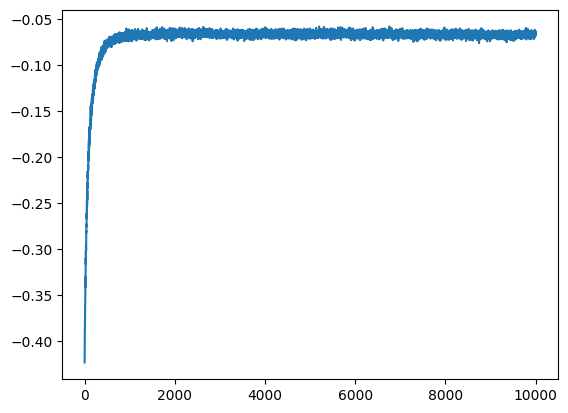

In [12]:
plt.plot(accel[1:10000])